In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
data = pd.read_csv(url, header = None, names = columns)


In [8]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [10]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
input_size = X_train.shape[1]
hidden_size = 10
output_size = 1

np.random.seed(42)
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros(hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros(output_size)

def sigmoid(x):
  return 1/ (1 + np.exp(-x))

def sigmoid_derivative(x):
  return x * (1 - x)


In [37]:
learning_rate = 0.1
epochs = 1000

train_errors = []
test_errors = []

for epoch in range(epochs):
  hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
  hidden_layer_output = sigmoid(hidden_layer_input)

  output_layer_input = np.dot(hidden_layer_output, weights_hidden_input) + bias_output
  predictions_train = sigmoid(output_layer_input)

  train_error = np.mean((y_train - predictions_train.flatten()) **2)
  train_errors.append(train_error)

  output_error = y_train.reshape (-1,1) - predictions_train
  output_delta = output_error * sigmoid_derivative(predictions_train)

  hidden_error = np.dot(output_delta, weights_hidden_output.T)
  hidden_delta = hidden_error * sigmoid_derivative(hidden_layer_output)

  weights_hidden_output += np.dot(hidden_layer_output.T, output_delta) * learning_rate
  bias_output += np.sum(output_delta, axis = 0) * learning_rate
  weights_input_hidden += np.dot(X_train.T, hidden_delta) * learning_rate
  bias_hidden += np.sum(hidden_delta, axis = 0) * learning_rate


<ipython-input-24-145354ba3848>:12: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


In [38]:
hidden_layer_test = sigmoid(np.dot(X_test, weights_input_hidden) + bias_hidden)
predictions_test = sigmoid(np.dot(hidden_layer_test, weights_hidden_output + bias_output))

test_error = np.mean ((y_test - predictions_test.flatten()) ** 2)
test_errors.append(test_error)

<ipython-input-24-145354ba3848>:12: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-x))


ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

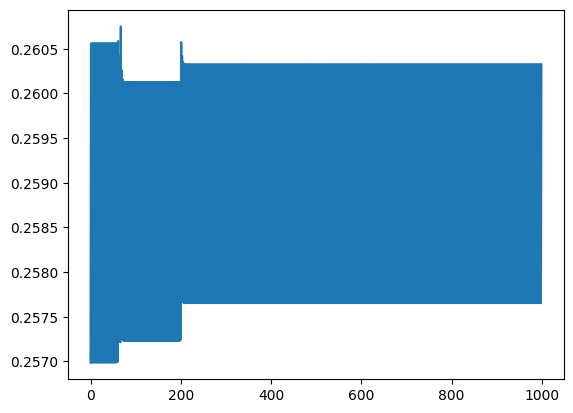

In [39]:
plt.plot(range(epochs), train_errors, label = 'Training Error')
plt.plot(range(epochs), test_errors, label = 'Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Error Rates vs Epochs')
plt.legend()
plt.show()
plt.show()